In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from astropy.io import fits

In [5]:
# data from TIC 55525572 : 1st validated planet from Planet Hunters TESS
# Data format - see:
#  https://exoplanetarchive.ipac.caltech.edu/docs/DVTimeSeries-Description.pdf
imfile = 'data/tess2018206190142-s0001-s0009-0000000055525572-00205_dvt.fits'

hdulist = fits.open(imfile)

hdulist.info()

Filename: data/tess2019169103026-s0013-0000000055525572-0146-s_tp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   20479R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [12]:
hdu0 = hdulist[0]
hdu1 = hdulist[1]
hdu2 = hdulist[2]


In [21]:
print(hdu1.columns)
hdu1.header


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_INIT_ERR'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_DETREND'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
)


XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   44 / length of first array dimension                
NAXIS2  =               113454 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [22]:
data1 = hdu1.data

time - start: 1453.6603250957353 ; end:1455.6589165084638


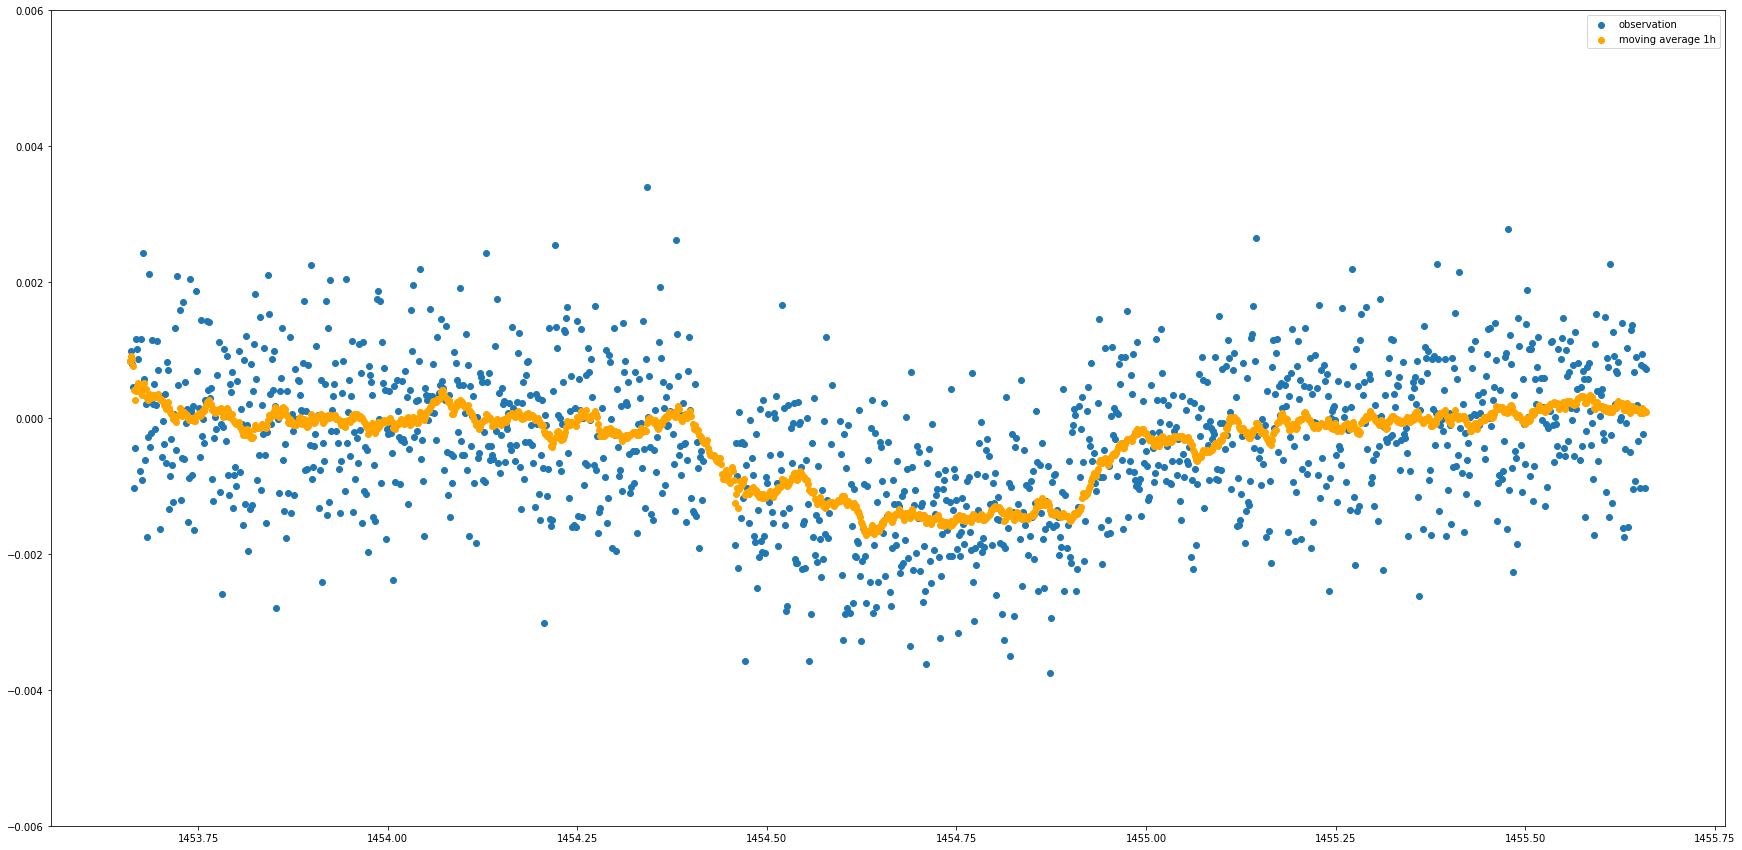

In [54]:
# Note in the dataset, transit occurs at phase = 0
mask_1 = data1['PHASE'] <= 1 
mask_2 = data1['PHASE'] >= -1
mask_3 = data1['TIME'] < 1470  # or > 1520 for next cycle, the data has cycles, so the phase is back to 0, use time to 

subset1 = data1[np.logical_and(np.logical_and(mask_1, mask_2), mask_3)]

# convert to dataframe to use panda's stats features
df1 = pd.DataFrame(subset1)
df1['TIME']

moving_avg_window = '1h'
df1['TIME_ts'] = df1['TIME'].apply(lambda x: pd.Timestamp(x * 1000000000 * 60 * 60 * 24))
df1['LC_MAvg1h'] = df1.rolling(moving_avg_window, on='TIME_ts')['LC_INIT'].mean()

plt.figure(figsize=(30, 15))
# plt.scatter(df1['PHASE'], df1['LC_INIT'])
plt.scatter(df1['TIME'], df1['LC_INIT'], label='observation')
plt.scatter(df1['TIME'], df1['LC_MAvg1h'], color='orange', label=f'moving average {moving_avg_window}')
plt.ylim(-0.006, 0.006)
plt.legend()

print(f"time - start: {df1['TIME'].min()} ; end:{df1['TIME'].max()}")


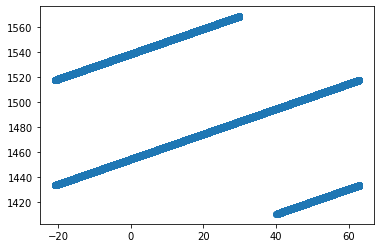

In [7]:
# show the transit phase (transit at phase 0) across time
plt.scatter(data1['PHASE'], data1['TIME'])

In [26]:
# Explore statistics
print(hdu2.columns)
hdu2.header


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'sigma'; disp = 'E14.7'
    name = 'RESIDUAL_LC'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'DEWEIGHTS'; format = 'E'; unit = 'proportion'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'SES_CORR_0_5'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_1_0'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_1_5'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_2_0'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_2_5'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_3_0'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_3_5'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_4_5'; format = 'E'; disp = 'E14.7'


XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  156 / length of first array dimension                
NAXIS2  =               113454 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   38 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [27]:
data2 = hdu2.data
len(data2)

113454

113454

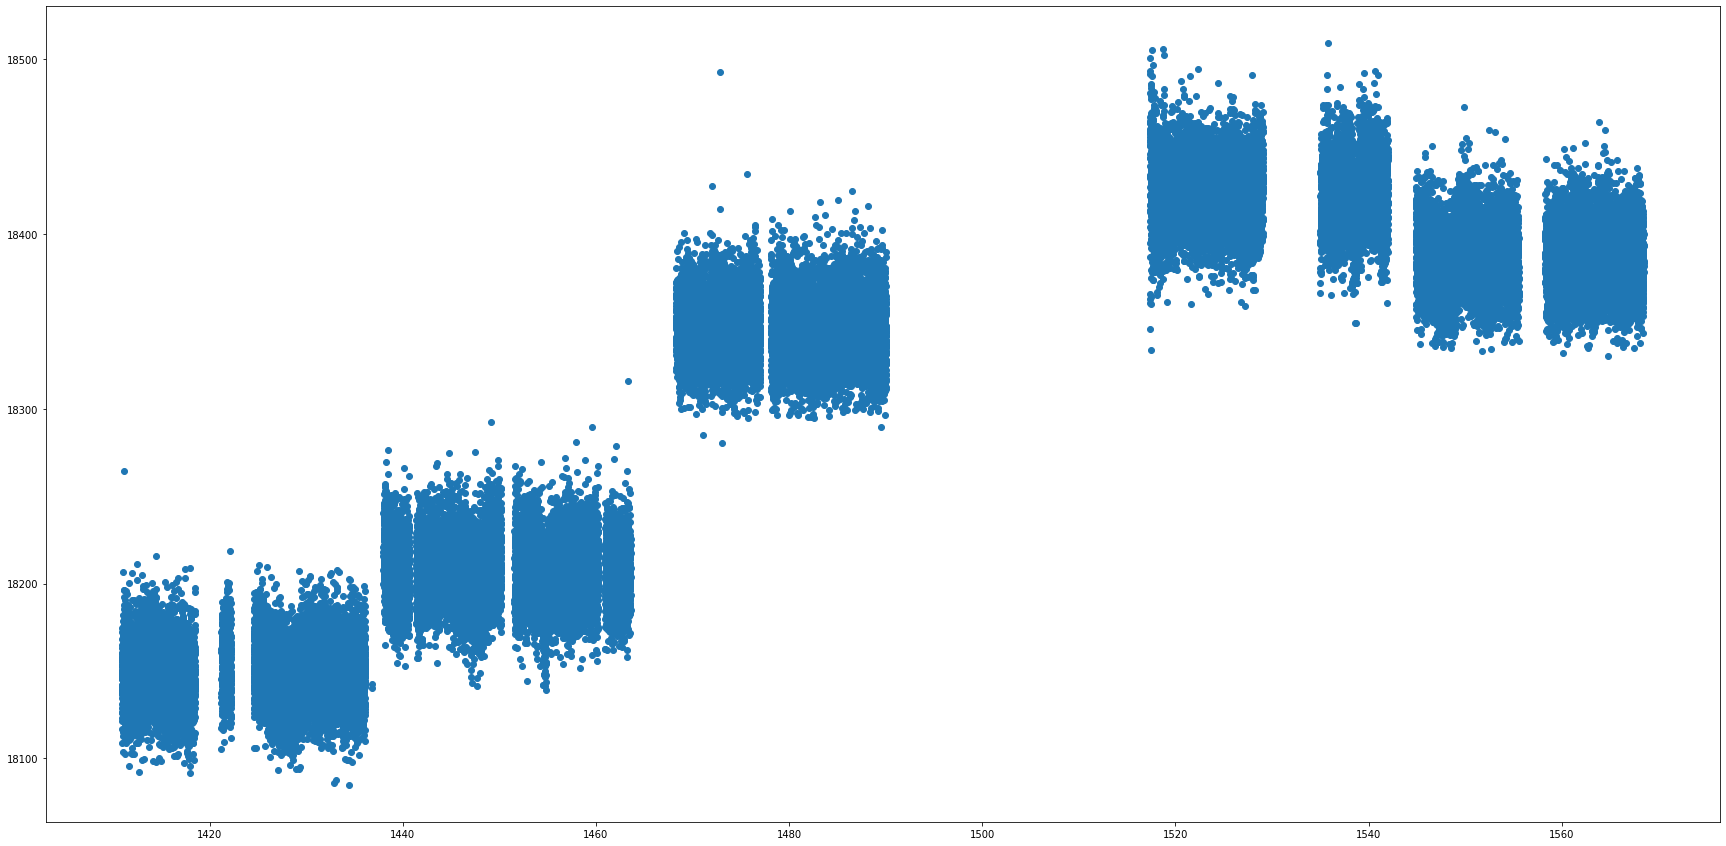

In [58]:
df2 = pd.DataFrame(data2)

mask_1 = data2['TIME'] >= df1['TIME'].min()
mask_2 = data2['TIME'] <= df1['TIME'].max()

subset2 = data2[np.logical_and(mask_1, mask_2)]
subset2 = data2

plt.figure(figsize=(30,15))
plt.scatter(subset2['TIME'], subset2['PDCSAP_FLUX'])  # 'PDCSAP_FLUX' , 'DEWEIGHTS', 'QUALITY', 'RESIDUAL_LC'

len(subset2)


In [8]:
# close the file
hdulist.close()

113454